# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

# Data Collection and Cleaning

In [2]:
df = pd.read_csv("refactored_foods.csv")
df = df.iloc[:841,:]
df
df = df.drop('image nr', axis=1)
df = df[df['Food vs nonfood'] == "Food"]
df = df.drop('Food vs nonfood', axis=1)
df = df.drop('State of food', axis=1)
df = df[df['Food classification'] != 'Unappealing']
df = df[df['Food classification'] !=  'African']

df.reset_index(drop=True,inplace=True)

# Standardization Functions

In [3]:
def standardize_classification(item):
    if (not isinstance(item, str)) and (math.isnan(float(item))):
        return item
    elif item == "Universal":
        return 0
    elif item == "Western":
        return 1
    elif item == "Asian":
        return 2

def standardize_natural(item):
    if (not isinstance(item, str)) and (math.isnan(float(item))):
        return item
    elif item == "Natural":
        return 1
    else:
        return 0
    
def standardize_flavor(item):
    if (not isinstance(item, float)) and (not isinstance(item, str)) and (math.isnan(float(item))):
        return item
    elif item == "Savory":
        return 1
    else:
        return 0
    
def standardize_complexity(item):
    if (not isinstance(item, str)) and (math.isnan(float(item))):
        return item
    elif (item == "Complex") or (item == "complex"):
        return 10
    elif (int(item) >= 10):
        return 10
    else:
        return item

In [4]:
df['Food classification'] = df['Food classification'].apply(lambda x: standardize_classification(x))
df['Natural vs transformed'] = df['Natural vs transformed'].apply(lambda x: standardize_natural(x))
df['Sweet vs savory'] = df['Sweet vs savory'].apply(lambda x: standardize_flavor(x))
df['Complexity (amount, number of items)'] = df['Complexity (amount, number of items)'].apply(lambda x: standardize_complexity(x))
df

universalIdx = df.index[df['Food classification'] == 0].tolist()
westernIdx = df.index[df['Food classification'] == 1].tolist()
easternIdx = df.index[df['Food classification'] == 2].tolist()

# Populate Missing Values

In [5]:
temp = df
temp = df[df['Average_Health_JP'].notna() & df['St._dev_Health_JP'].notna()]

imp = IterativeImputer(max_iter=5, n_nearest_features=10, sample_posterior=True, random_state=0)
imp.fit(temp.iloc[:,2:])
newDf = imp.transform(df.iloc[:,2:])

df2 = pd.DataFrame(newDf)
df2.head()
classif = df["Food classification"]
df2.insert(0, 'Food classification', classif)

df2.iloc[:,2] = df2.loc[:,2].apply(lambda x: round(abs(x)))
df2

,Food classification,0,1,2,3,4,5,6,7,8,...,47,48,49,50,51,52,53,54,55,56
0,0,2.000000,0,0.0,0.243900,4.661700,63.855300,0.024000,0.348000,0.989900,...,80.470000,12.070000,65.090000,26.500000,63.730000,27.000000,65.850000,29.620000,65.380000,22.610000
1,0,3.000000,0,0.0,0.333800,5.009400,65.400400,0.041000,0.338100,0.982300,...,74.320000,19.220000,63.080000,28.460000,61.320000,27.190000,69.230000,29.350000,59.060000,28.880000
2,0,10.000000,0,0.0,0.416800,4.939700,66.878400,0.056700,0.349200,0.976800,...,81.770000,17.190000,67.190000,25.450000,65.290000,23.370000,70.290000,25.220000,65.090000,27.610000
3,0,10.000000,0,0.0,0.311500,4.741200,66.040200,0.043300,0.387800,0.982800,...,79.140000,14.950000,63.190000,30.160000,60.310000,32.570000,66.580000,30.270000,63.220000,27.770000
4,1,1.000000,1,1.0,0.173500,4.527500,68.382500,0.050200,0.376500,0.981200,...,33.310000,22.190000,28.190000,26.710000,33.910000,33.470000,21.200000,19.050000,29.920000,25.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,1,3.353491,0,0.0,0.519400,4.871600,69.792700,0.084900,0.266900,0.962000,...,37.467815,26.029981,22.358234,19.026008,33.071980,16.877906,30.344590,23.761357,35.166363,23.455043
665,1,1.109133,0,0.0,0.201500,4.649500,68.238700,0.044200,0.353000,0.981700,...,60.148854,22.545949,37.448798,28.613968,25.962553,29.051695,35.877509,31.083371,50.875409,26.580238
666,1,5.712525,0,0.0,0.223600,4.628000,67.190600,0.041800,0.369000,0.982200,...,64.069490,14.070868,47.049192,26.409908,20.435275,18.750807,51.245196,20.052782,33.648313,15.638194
667,1,4.213748,0,0.0,0.232000,4.686300,67.378600,0.042000,0.353500,0.982300,...,88.298371,14.562236,29.971357,22.756588,50.770117,31.165214,45.909355,22.121043,44.466756,26.140181


# Dimensionality Reduction

In [11]:
reduced_data = PCA(n_components=2).fit_transform(df2)
pcaDf = pd.DataFrame(reduced_data)
pcaDf
universalCords = pcaDf.iloc[universalIdx]
westernCords = pcaDf.iloc[westernIdx]
easternCords = pcaDf.iloc[easternIdx]

pd.DataFrame(reduced_data)

,0,1
0,-14.240926,-101.278674
1,1658.469941,-80.357625
2,1443.566560,-90.738515
3,1027.431587,-87.506555
4,208.021923,38.576944
...,...,...
664,-564.855380,37.836286
665,106.658806,-33.030842
666,59.923009,-25.473600
667,860.972982,-34.168259


# K-Means Clustering and Visualization

(array([-4000., -2000.,     0.,  2000.,  4000.,  6000.,  8000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

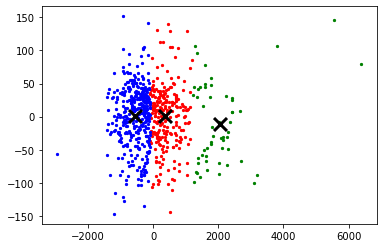

In [7]:
# Code Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

kmeans = KMeans(init="k-means++", n_clusters=3, n_init=4, max_iter=300)
y_kmeans = kmeans.fit_predict(reduced_data)

plt.scatter(reduced_data[y_kmeans==0, 0], reduced_data[y_kmeans==0, 1], s=5, c='red', label ='Cluster 1')
plt.scatter(reduced_data[y_kmeans==1, 0], reduced_data[y_kmeans==1, 1], s=5, c='blue', label ='Cluster 1')
plt.scatter(reduced_data[y_kmeans==2, 0], reduced_data[y_kmeans==2, 1], s=5, c='green', label ='Cluster 1')

centroids = kmeans.cluster_centers_

plt.scatter(
   centroids[:, 0],
   centroids[:, 1],
   marker="x",
   s=169,
   linewidths=3,
   color="black",
   zorder=10,
)

plt.xticks(visible = True)
plt.xticks(visible = True)

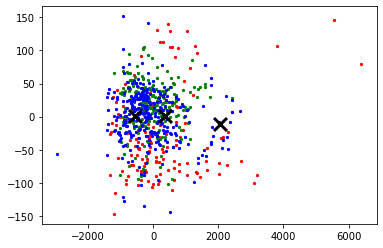

In [8]:
plt.show()
plt.scatter(universalCords.iloc[:,0] , universalCords.iloc[:,1] , color = 'red', s=5)
plt.scatter(westernCords.iloc[:,0] , westernCords.iloc[:,1] , color = 'green', s=5)
plt.scatter(easternCords.iloc[:,0] , easternCords.iloc[:,1] , color = 'blue', s=5)
plt.scatter(
   centroids[:, 0],
   centroids[:, 1],
   marker="x",
   s=169,
   linewidths=3,
   color="black",
   zorder=10,
)
plt.show()

# Logistic Regression Results

In [9]:
temp = df.dropna()
temp = temp.drop('Description', axis=1)

model = LogisticRegression()

for i in range(0,5):

    X = temp.drop(columns=['Food classification'])
    Y = temp['Food classification']
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

    model.fit(x_train, y_train)
    print("Accuracy of LR Model: ", model.score(x_test, y_test))

Accuracy of LR Model:  0.7762237762237763
Accuracy of LR Model:  0.8181818181818182
Accuracy of LR Model:  0.7342657342657343
Accuracy of LR Model:  0.7272727272727273
Accuracy of LR Model:  0.7832167832167832


,Universal%,Western%,Asian%
0,0.03,0.01,0.96
1,0.15,0.29,0.56
2,0.85,0.03,0.12
3,0.00,0.00,1.00
4,0.00,0.00,1.00
...,...,...,...
138,0.36,0.48,0.15
139,0.18,0.81,0.01
140,0.22,0.18,0.60
141,0.02,0.98,0.00


,Food classification
278,2
84,0
32,0
283,2
383,2
...,...
4,1
250,1
381,2
124,0


In [ ]:
y_pred = model.predict(x_test)

probs_y = model.predict_proba(x_test)
probs_y = np.round(probs_y, 2)

pred_perc = pd.DataFrame(probs_y)
pred_perc.columns = ['Universal%', 'Western%', 'Asian%']

display(pred_perc)
display(pd.DataFrame(y_test))